In [9]:
import matplotlib.pyplot as plt
import os
import cv2
import sys
import random
from PIL import Image
import numpy as np

from torchvision import transforms

sys.path.insert(0, "..\\Scripts")

from DataAugmentation import DataAugmentation

In [10]:
im_path = os.path.join("..\\Dataset\\train_set", "train_043794.jpg")
img = cv2.imread(im_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = Image.fromarray(img)

aug = DataAugmentation()
im_hole = aug.random_cutout(img)
im_sat = aug.random_saturation(img)
im_rot = aug.random_rotation(img)
im_blur = aug.random_gaussian_blur(img)
im_crop = aug.random_resized_crop(img)
im_brightness = aug.random_brightness(img)
im_tot = aug.apply_transformations(img)

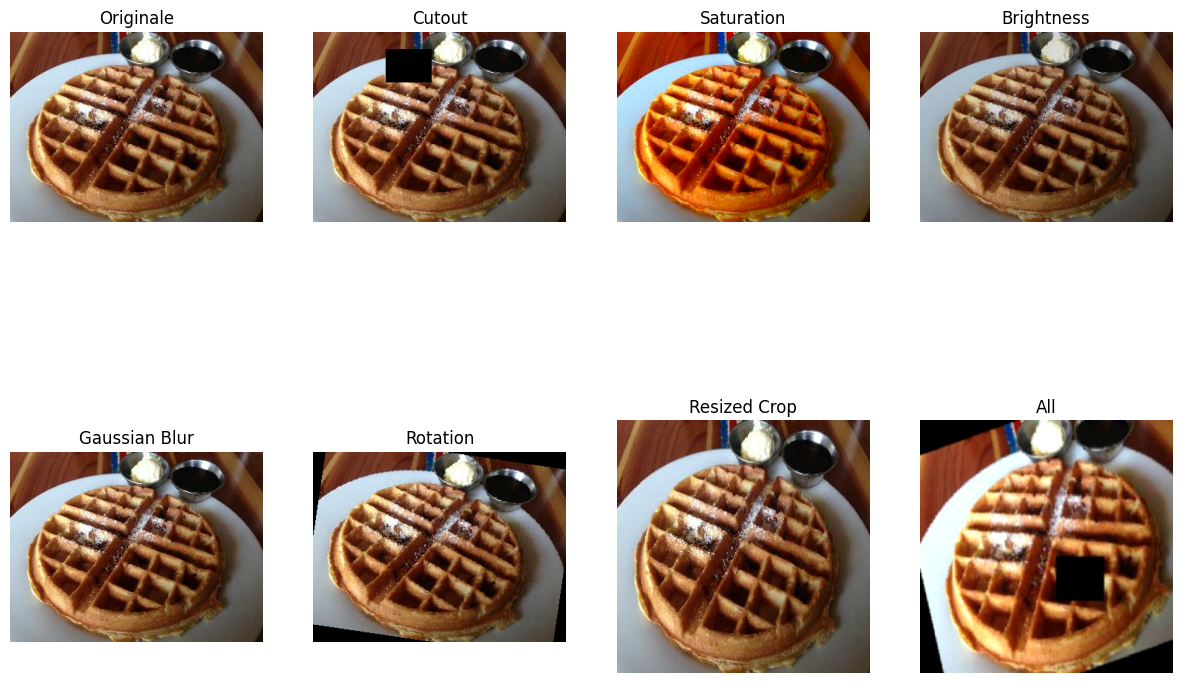

In [11]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

ax[0][0].imshow(img)
ax[0][0].set_title("Originale")
ax[0][0].axis("off")

ax[0][1].imshow(im_hole)
ax[0][1].set_title("Cutout")
ax[0][1].axis("off")

ax[0][2].imshow(im_sat)
ax[0][2].set_title("Saturation")
ax[0][2].axis("off")

ax[0][3].imshow(im_brightness)
ax[0][3].set_title("Brightness")
ax[0][3].axis("off")

ax[1][0].imshow(im_blur)
ax[1][0].set_title("Gaussian Blur")
ax[1][0].axis("off")

ax[1][1].imshow(im_rot)
ax[1][1].set_title("Rotation")
ax[1][1].axis("off")

ax[1][2].imshow(im_crop)
ax[1][2].set_title("Resized Crop")
ax[1][2].axis("off")

ax[1][3].imshow(im_tot)
ax[1][3].set_title("All")
ax[1][3].axis("off")

plt.show()